# Processing surfaces and points in napari - from python
[napari-process-points-and-surfaces]() (nppas) allows post-processing of surface and point cloud data. The available functionality uses [open3d](http://www.open3d.org/) in the background.
For detailed explanation of the underlying algorithms, please refer to the [open3d documentation](http://www.open3d.org/docs/release/).

In [1]:
import napari
from napari.utils import nbscreenshot
import numpy as np

from napari_process_points_and_surfaces import convex_hull,\
            filter_smooth_simple,\
            filter_smooth_laplacian,\
            filter_smooth_taubin,\
            simplify_vertex_clustering,\
            simplify_quadric_decimation,\
            subdivide_loop,\
            labels_to_centroids,\
            sample_points_uniformly,\
            sample_points_poisson_disk,\
            voxel_down_sample,\
            points_to_labels,\
            points_to_convex_hull_surface,\
            surface_from_point_cloud_alpha_shape,\
            surface_from_point_cloud_ball_pivoting,\
            all_labels_to_surface,\
            label_to_surface,\
            largest_label_to_surface,\
            fill_holes

napari.manifest -> 'napari' could not be imported: Could not find file 'builtins.yaml' in module 'napari'


In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

napari.manifest -> 'napari' could not be imported: Could not find file 'builtins.yaml' in module 'napari'


In [3]:
from skimage.data import cells3d
nuclei = cells3d()[:,1,60:120,30:80]
nuclei.shape

(60, 60, 50)

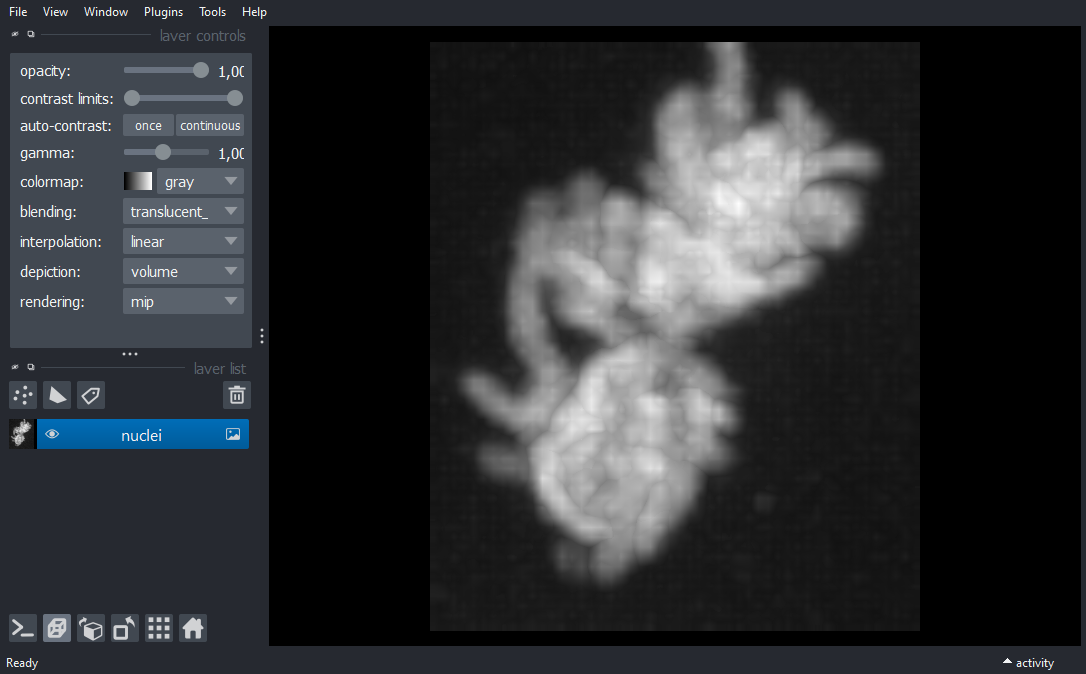

In [4]:
viewer.add_image(nuclei)

nbscreenshot(viewer)

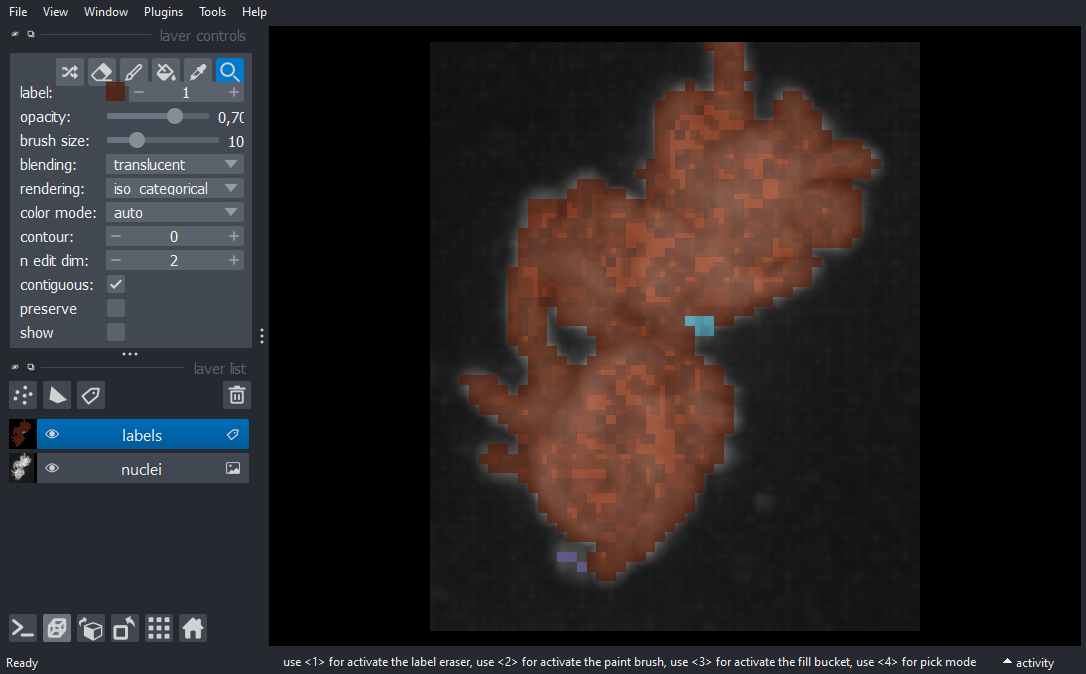

In [5]:
from skimage.measure import label
labels = label(nuclei>20000)

viewer.add_labels(labels)

nbscreenshot(viewer)

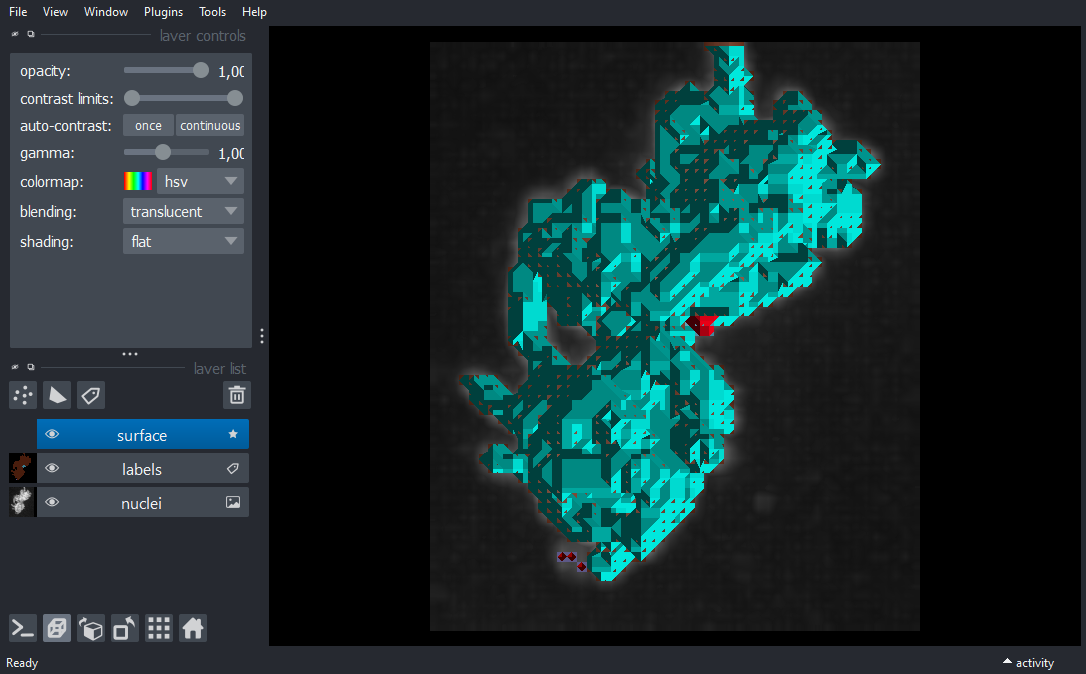

In [7]:
surface = all_labels_to_surface(labels)

surface_layer = viewer.add_surface(surface, blending='translucent', shading='flat', colormap='hsv')

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


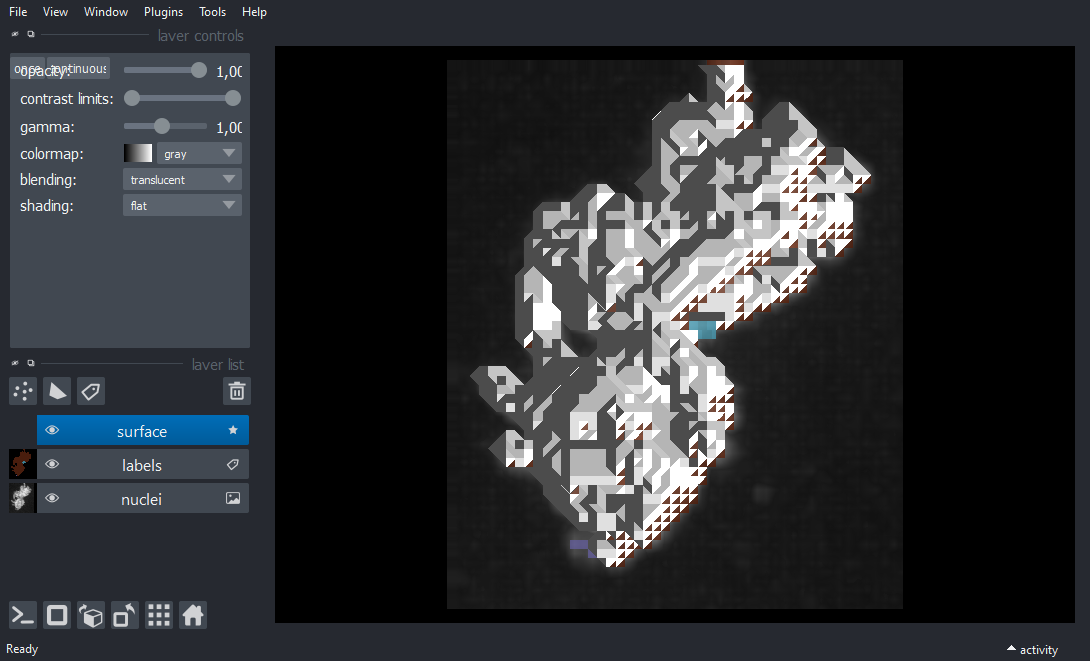

In [6]:
surface = largest_label_to_surface(labels)

surface_layer = viewer.add_surface(surface, blending='translucent', shading='flat')
surface = surface_layer.data

nbscreenshot(viewer)

## Surface filtering

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Alternative shading modes are only available in 3D, defaulting to none


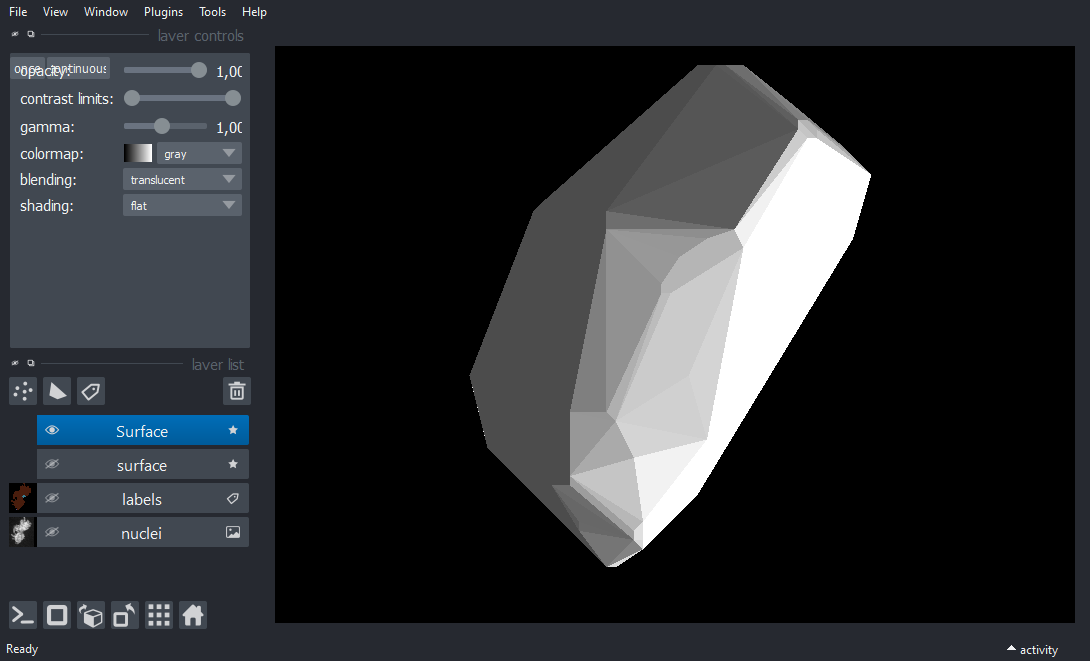

In [7]:
hide_all(viewer)

viewer.add_surface(convex_hull(surface))

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


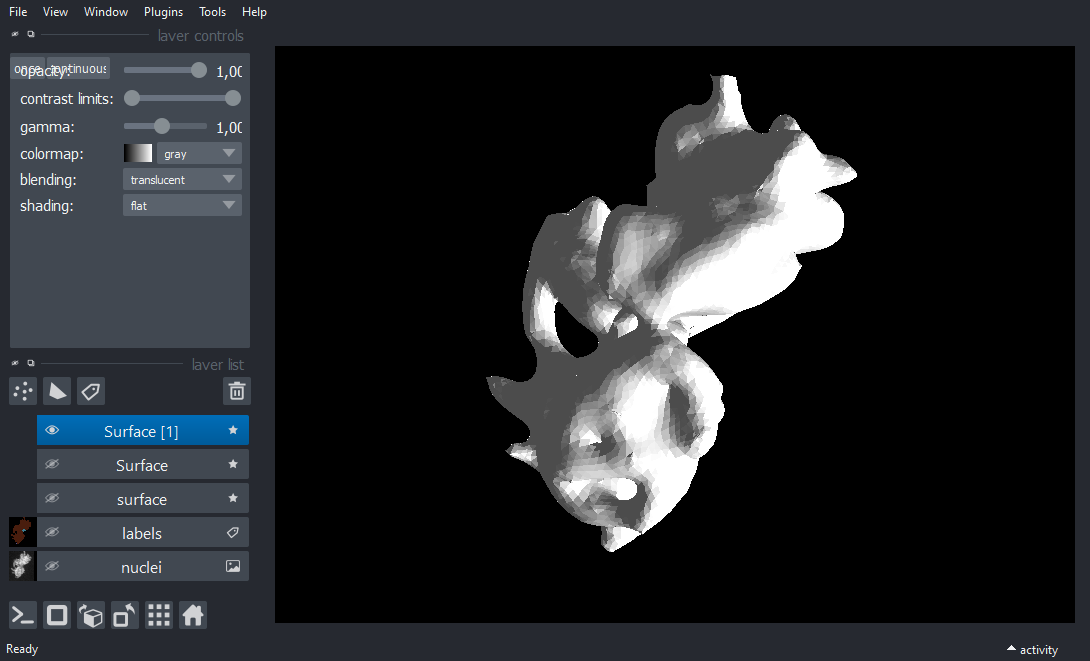

In [8]:
hide_all(viewer)

viewer.add_surface(filter_smooth_simple(surface, 10))

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


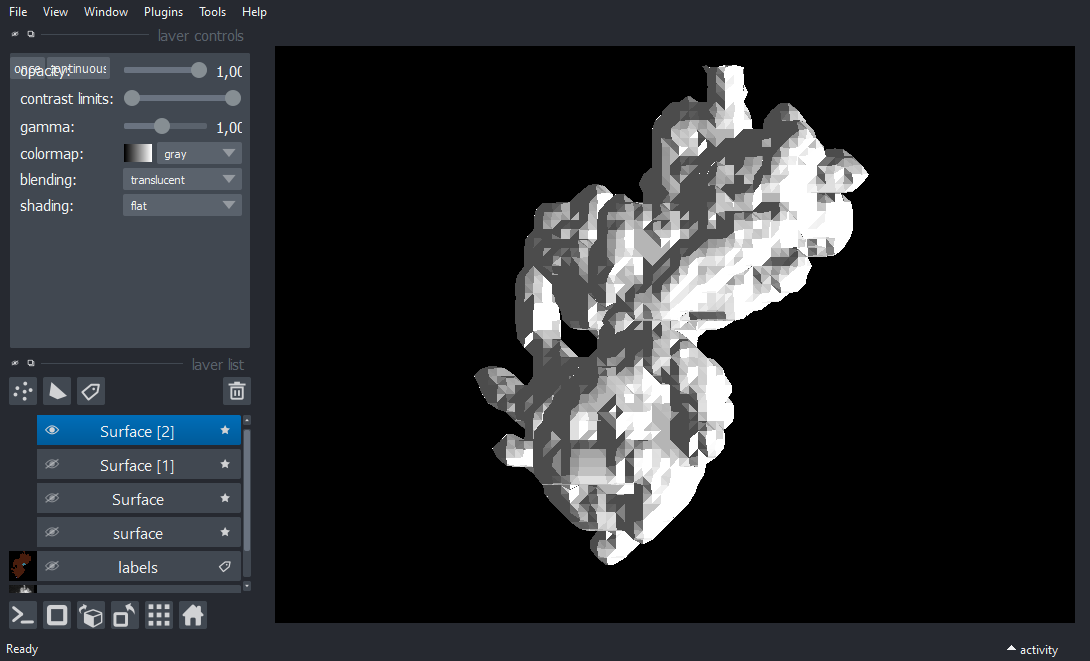

In [9]:
hide_all(viewer)

viewer.add_surface(filter_smooth_laplacian(surface, 1))

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


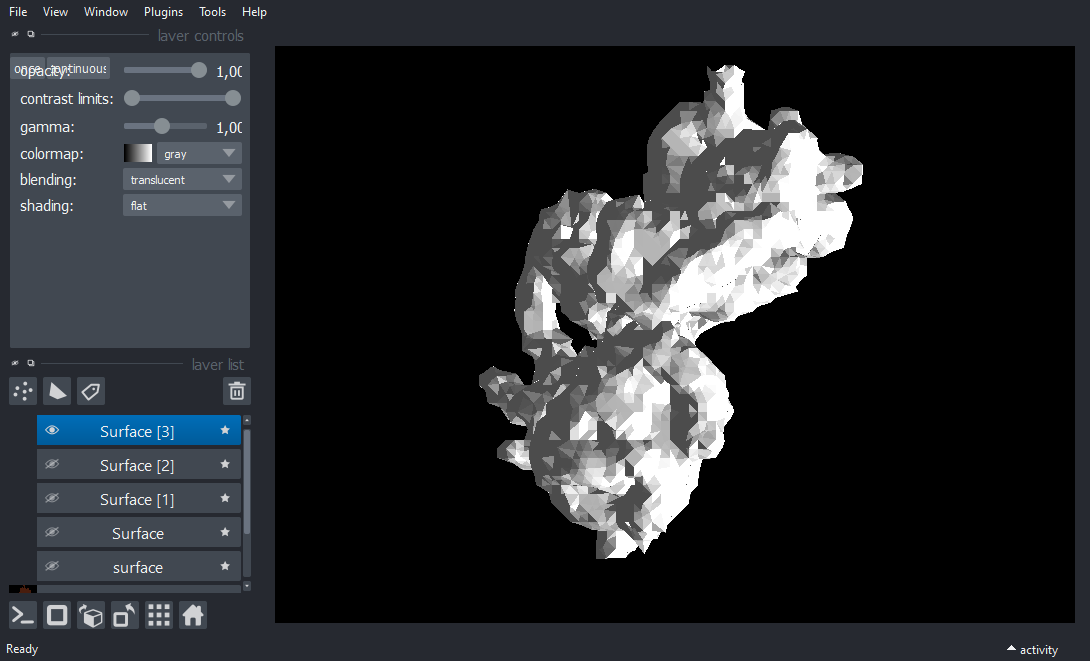

In [10]:
hide_all(viewer)

viewer.add_surface(filter_smooth_taubin(surface, 100))

nbscreenshot(viewer)

## Surface simplification

Alternative shading modes are only available in 3D, defaulting to none


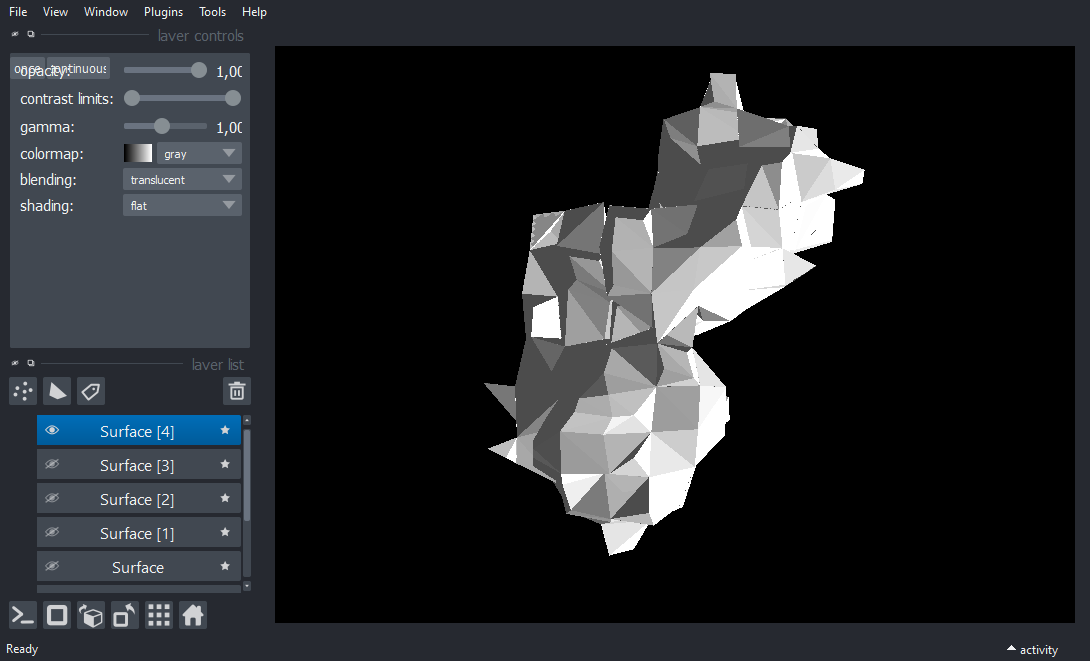

In [11]:
hide_all(viewer)

viewer.add_surface(simplify_vertex_clustering(surface))

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


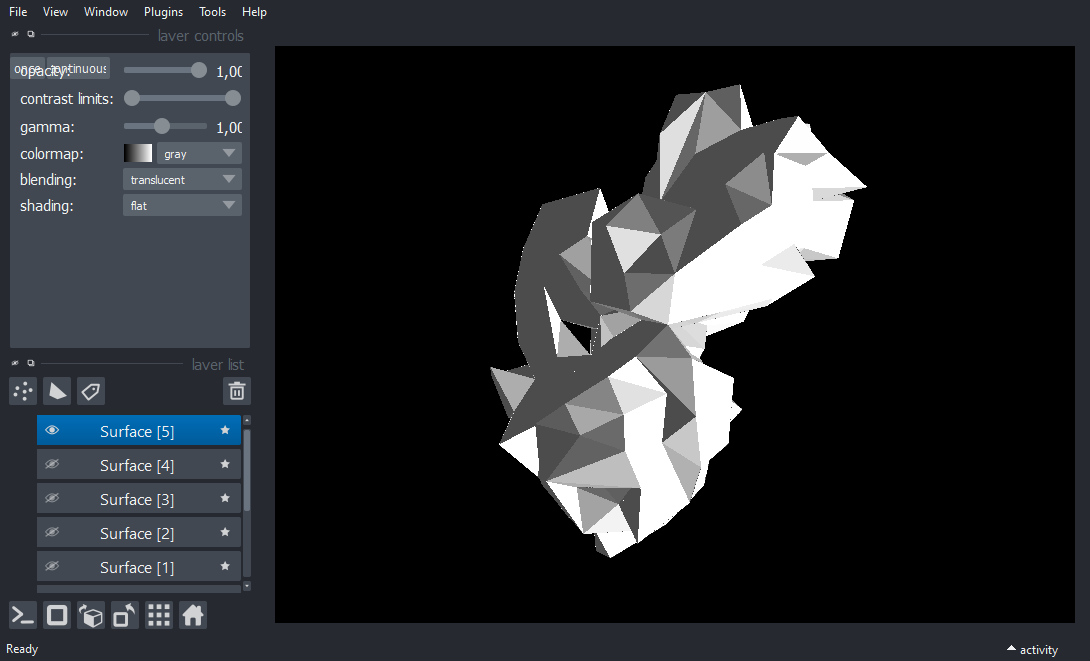

In [12]:
hide_all(viewer)

viewer.add_surface(simplify_quadric_decimation(surface))

nbscreenshot(viewer)

[Open3D WARNING] [SubdivideLoop] boundary edge with > 2 neighbours, maybe mesh is not manifold.
[Open3D WARNING] [SubdivideLoop] boundary edge with > 2 neighbours, maybe mesh is not manifold.
[Open3D WARNING] [SubdivideLoop] boundary edge with > 2 neighbours, maybe mesh is not manifold.


Alternative shading modes are only available in 3D, defaulting to none


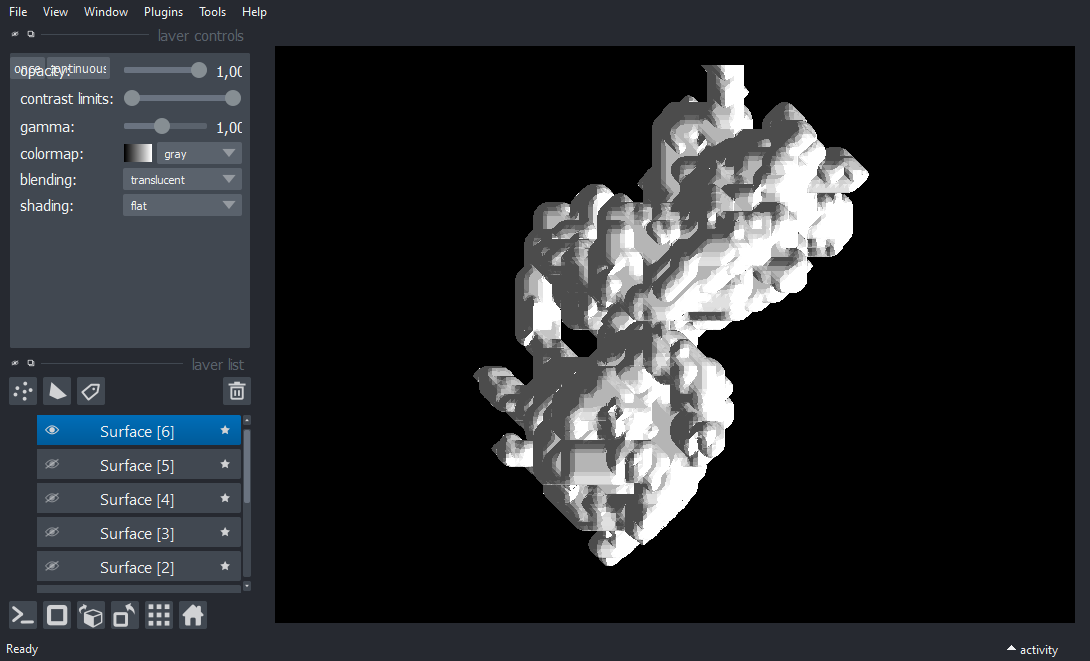

In [13]:
hide_all(viewer)

viewer.add_surface(subdivide_loop(surface))

nbscreenshot(viewer)

## Point clouds

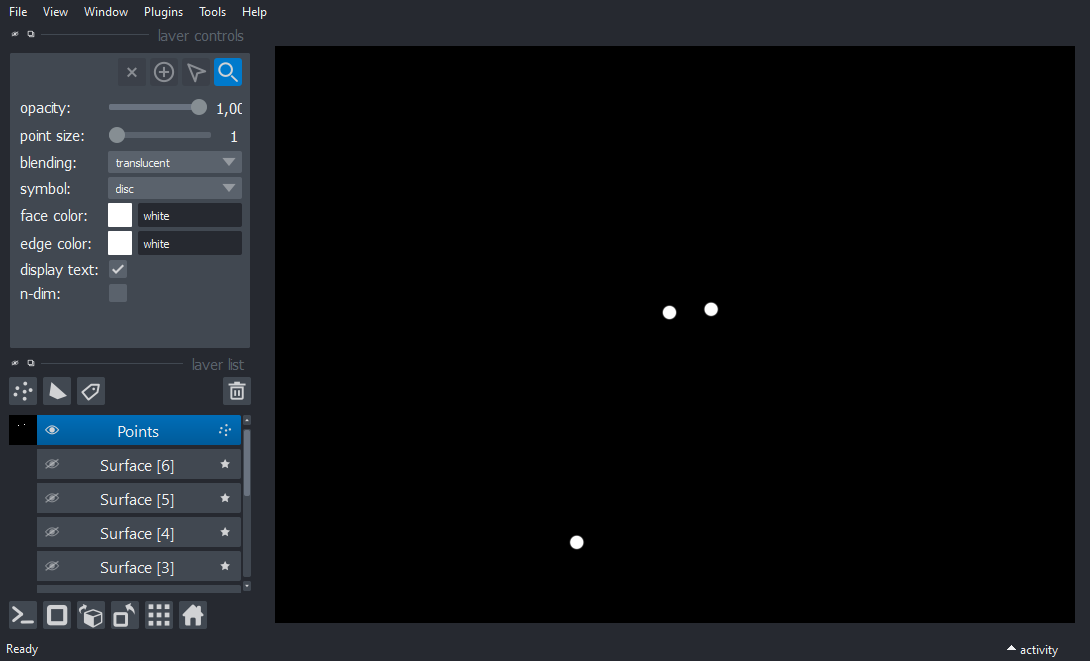

In [14]:
hide_all(viewer)

labels_to_centroids(labels, viewer=viewer)
centroids = viewer.layers[-1].data

nbscreenshot(viewer)

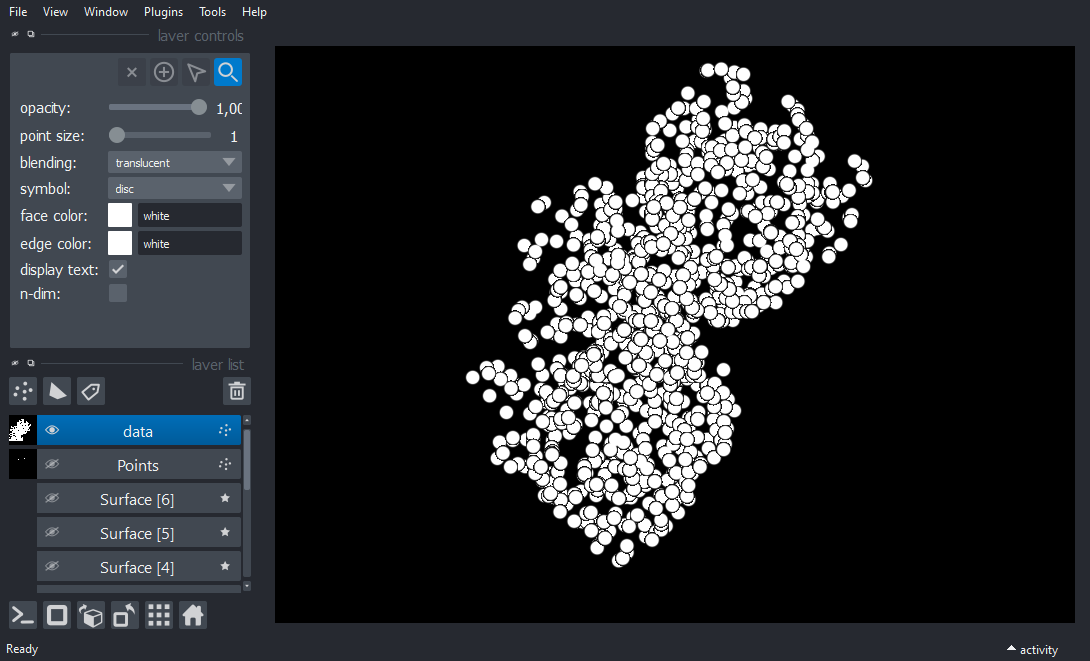

In [15]:
hide_all(viewer)
    
point_cloud = sample_points_uniformly(surface, number_of_points=1000, viewer=viewer)

nbscreenshot(viewer)

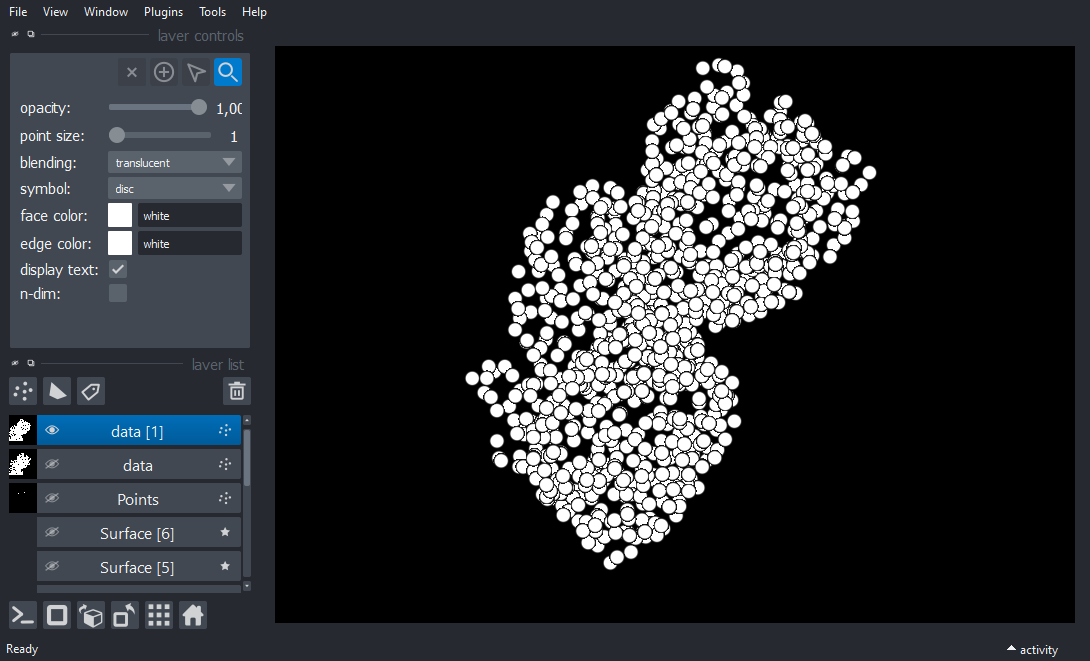

In [16]:
hide_all(viewer)

sample_points_poisson_disk(surface, number_of_points=1000, viewer=viewer)
points_layer = viewer.layers[-1]

nbscreenshot(viewer)

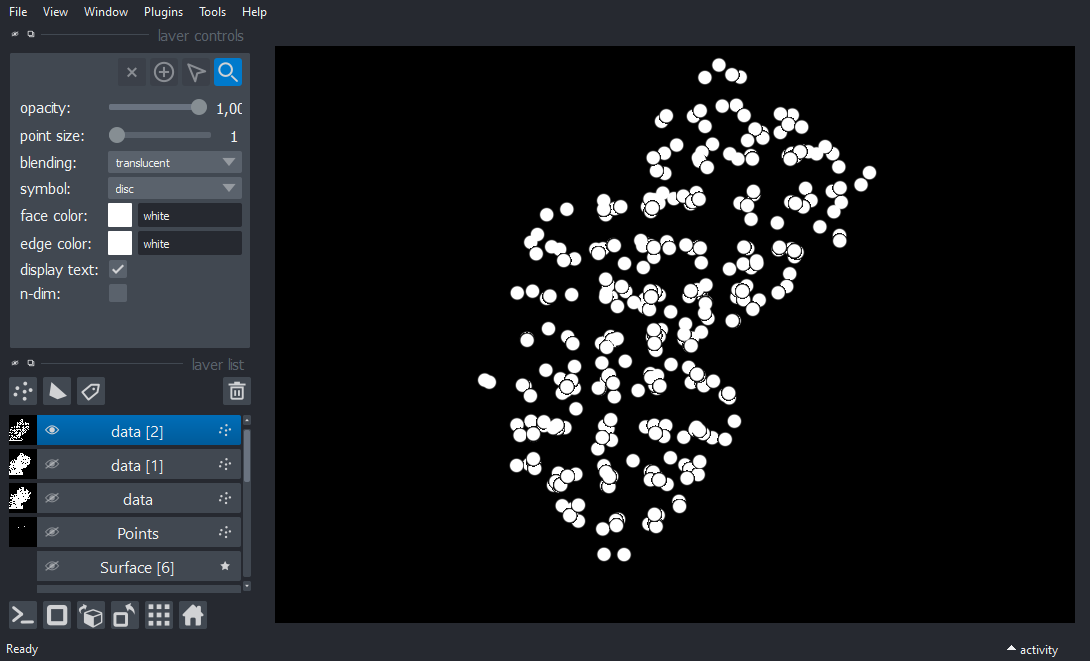

In [17]:
hide_all(viewer)
    
voxel_down_sample(points_layer.data, viewer=viewer)

nbscreenshot(viewer)

## From points to labels

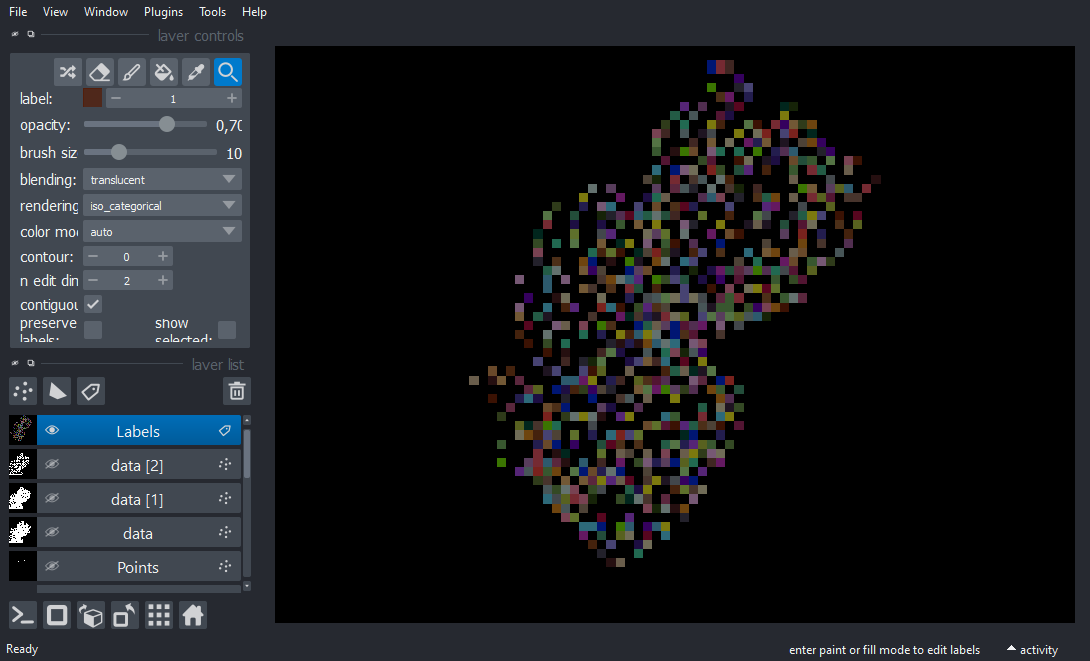

In [18]:
hide_all(viewer)

viewer.add_labels(points_to_labels(points_layer.data, labels))

nbscreenshot(viewer)

## From points to surfaces

Alternative shading modes are only available in 3D, defaulting to none


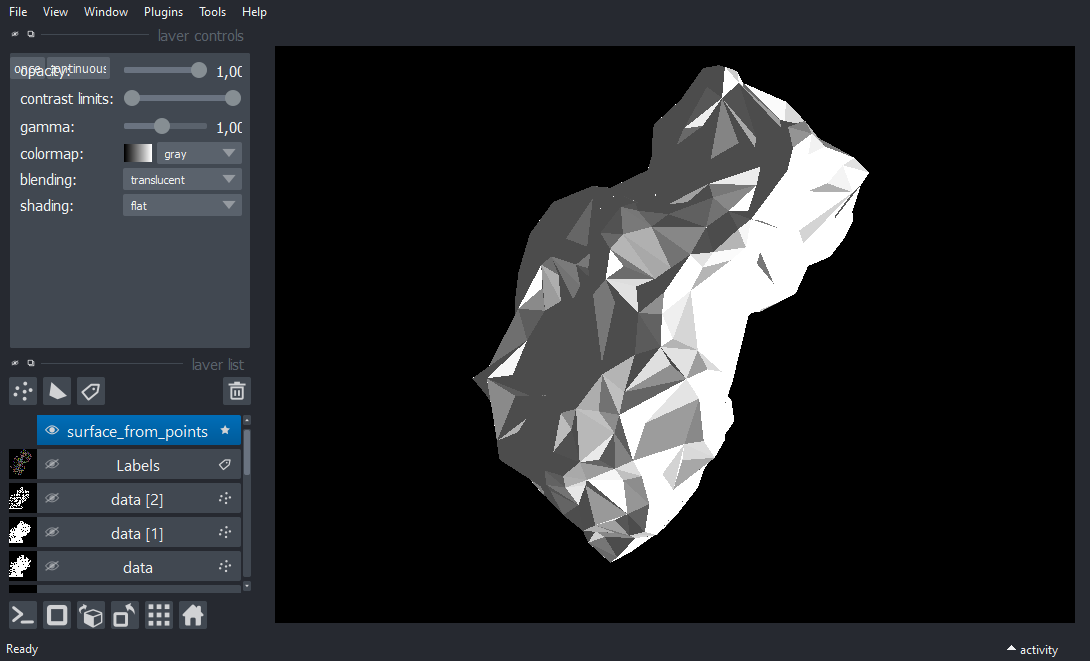

In [19]:
hide_all(viewer)

surface_from_points = surface_from_point_cloud_alpha_shape(points_layer.data)
viewer.add_surface(surface_from_points)

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


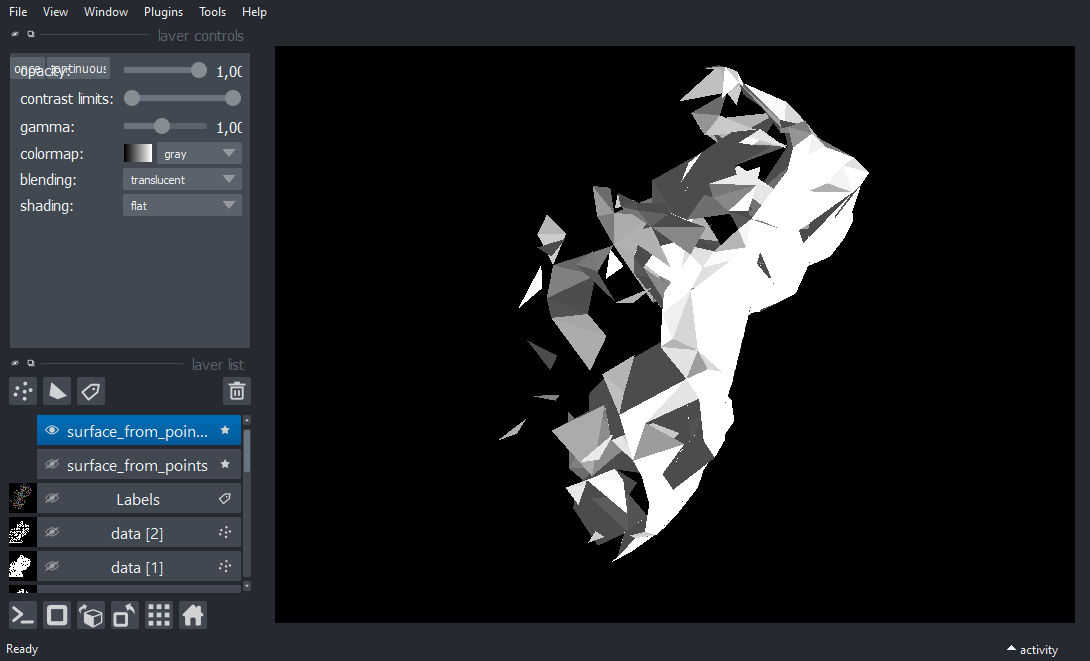

In [20]:
hide_all(viewer)

surface_from_points = surface_from_point_cloud_ball_pivoting(points_layer.data)
viewer.add_surface(surface_from_points)

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


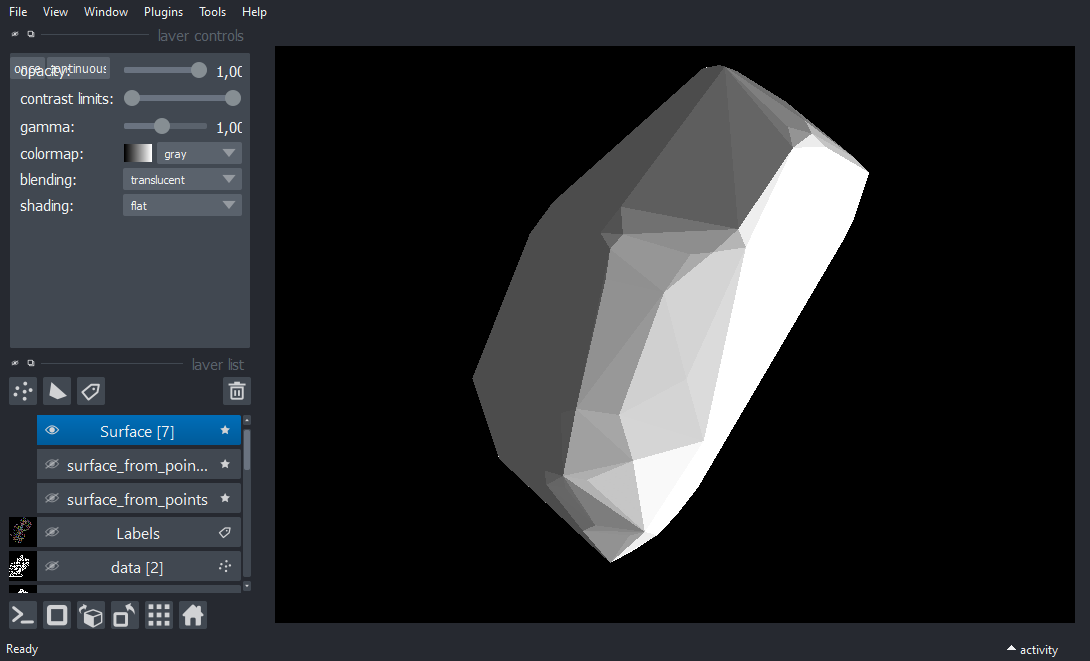

In [21]:
hide_all(viewer)

viewer.add_surface(points_to_convex_hull_surface(points_layer.data))

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


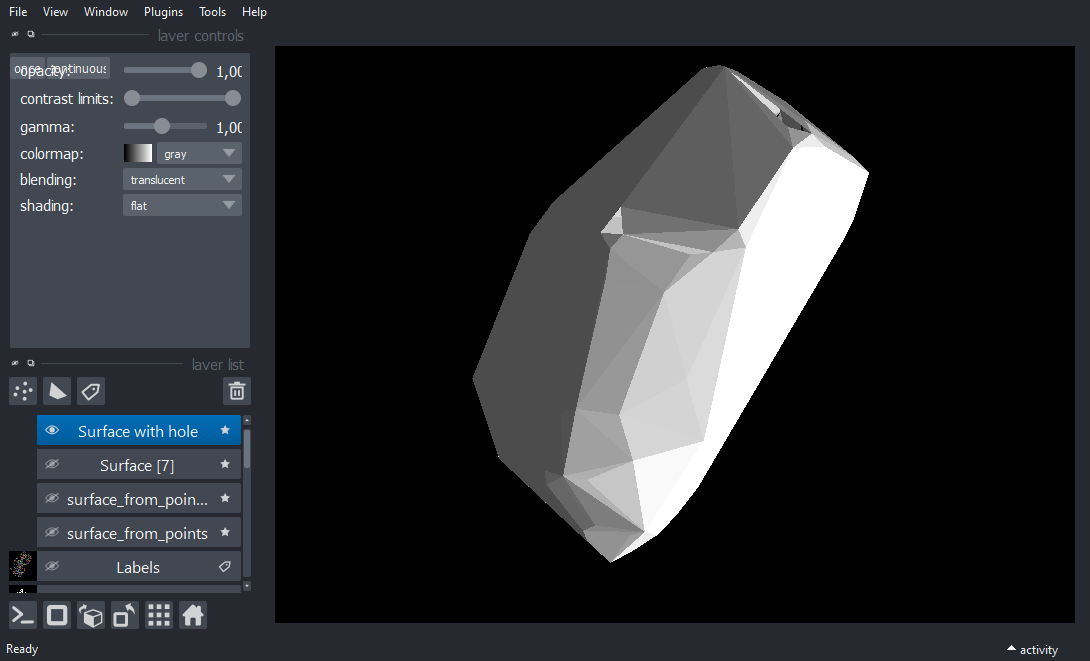

In [22]:
hide_all(viewer)

surface = points_to_convex_hull_surface(points_layer.data)
faces_del = np.delete(surface[1], np.random.randint(0, surface[1].shape[0], 10), axis=0)
viewer.add_surface((surface[0], faces_del), name='Surface with hole')
nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


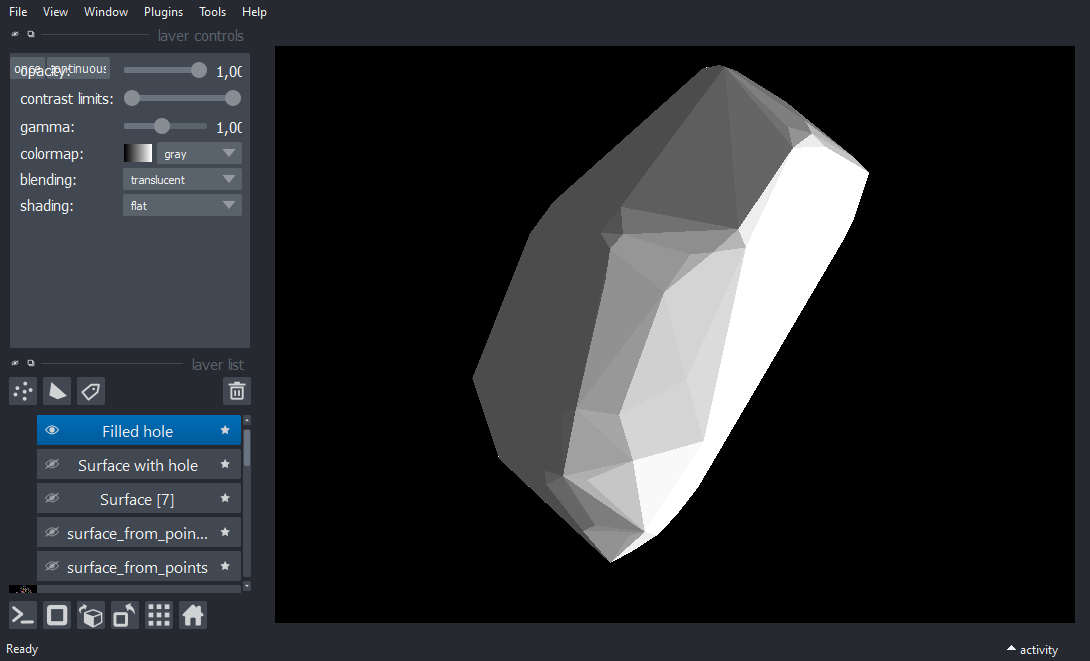

In [23]:
hide_all(viewer)
viewer.add_surface(fill_holes((surface[0], faces_del), size_limit=1000), name='Filled hole')
nbscreenshot(viewer)

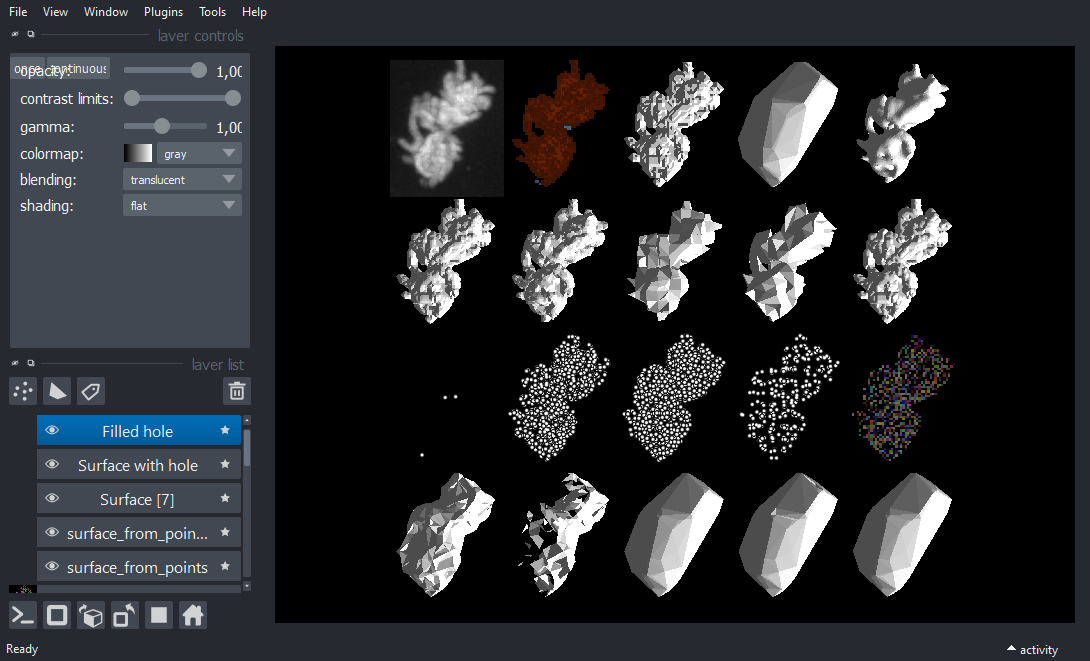

In [24]:
show_all(viewer)

viewer.grid.enabled = True
viewer.grid.stride = -1

nbscreenshot(viewer)